In [1]:
# Import libraries
%reload_ext autoreload
%autoreload 2

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from IPython.display import display, HTML, Latex, Image, Video
from IPython.display import Markdown as md
from IPython.core.magic import register_cell_magic
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
import mercury as mr

# Allow for markdown code cells
@register_cell_magic
def markdown(line, cell):
    return md(cell.format(**globals()))

# Add functions for sin and cosine using degrees
def sin_degrees(degrees):
    radians = math.radians(degrees)
    sin = math.sin(radians)
    return sin
def cos_degrees(degrees):
    radians = math.radians(degrees)
    cos = math.cos(radians)
    return cos

# Set the Mercurty metadata forthe report
app = mr.App(title="Lab 6 - Friction II (Inclined Plane)", description="Lab report for PHYS 2125 (15921) Spring 2025 Lab 6.")

# Lab Information
name = mr.Text(value="Your Name", label="What is your name?", rows=1)
course = mr.Text(value="PHYS 2125 (15921)", label="What class are you in?", rows=1)
date = mr.Text(value="2025-02-21", label="Lab Date", rows=1)
labNum = mr.Text(value="6", label="Lab Number", rows=1)
labName = mr.Text(value="Friction II (Vertical Plane)", label="Lab Name", rows=1)
labObjective= mr.Text(value="Determine the kinetic coefficient of friction between the wooden block and the track.", label="Objective", rows=3)
file = mr.File(label="Data file upload", max_file_size="10MB")
defaultFile = "lab6.csv"
# skip1 = mr.Checkbox(value=False, label="Were you instructed to exclude your first trial from the calculations?")
# It would be cooler if we could get the discussion questions into a dict and loop through them.
q1 = mr.Text(value="Question 1 Answer", label="Question 1?", rows=5)
q2 = mr.Text(value="Question 2 Answer", label="Question 2?", rows=5)
q3 = mr.Text(value="Question 3 Answer", label="Question 3?", rows=5)
discussion = mr.Text(value="Discussion", label="Discuss", rows=5)
plt1_xaxis = mr.Text(value = '$cos(\\theta)$', label="X-axis label", rows=1)
plt1_yaxis = mr.Text(value = '$M_H (g)$', label="Y-axis label", rows=1)
plt1_title = mr.Text(value = '$cos(\\theta)\; vs\; M_H (g)$', label="Graph title", rows=1)
dataColumnNames = ["$\\theta\\textdegree$", "$M_a$ (g)", "$M_h$ (g)", "$M_H$ (g)", "$cos(\\theta)$", "$sin(\\theta)$", "$\mu_k$"];
indexColumn = dataColumnNames[0];

mercury.App

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.File

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

In [2]:
%autoreload 2

# Parse Data
if file.filepath is not None:
    df = pd.read_csv(file.filepath, names=dataColumnNames, header=0).set_index(indexColumn)
else:
    df = pd.read_csv(defaultFile, names=dataColumnNames, header=0).set_index(indexColumn)

# Remove the last row with the empty index
df = df.drop(df.tail(1).index)

# Constants
g_earth = 9.8;
m_b = 114; # 114 gram block

# Calculate M_H as M_h + M_a
df[dataColumnNames[3]] = df.apply(lambda row: row[dataColumnNames[2]] + row[dataColumnNames[1]], axis=1)

# Calculate cos theta
df[dataColumnNames[4]] = df.apply(lambda row: cos_degrees(row.name), axis=1)

# Calculate sin theta
df[dataColumnNames[5]] = df.apply(lambda row: sin_degrees(row.name), axis=1)

# Calculate μ_k
df[dataColumnNames[6]] = df.apply(lambda row: (row[dataColumnNames[3]] - (m_b * row[dataColumnNames[5]])) / (m_b * row[dataColumnNames[4]]), axis=1)

# Calculate the trend line slope and intercept
trend = np.polyfit(df[dataColumnNames[4]], df[dataColumnNames[3]], 1)  # 1 for linear trendline
trend_slope, trend_intercept = trend

# Calculate μ_k from the graph
u_k_g = trend_slope / m_b;

# Mean and StdDev across the board
mean = df.mean()
deviation = df.std(ddof=0)

# Calculate μ_k from the table
u_k_t = mean[dataColumnNames[6]];
u_k_t_dev = deviation[dataColumnNames[6]];

# Calculate % difference between u_k_table and u_k_graph
u_k_diff = abs( u_k_g - u_k_t ) / ( ( u_k_t + u_k_g ) / 2 )

# Save this for the graph
df_graph = df.fillna('');

# Add the average value of u_k
df.loc['Average'] = {
    dataColumnNames[1]: np.nan,
    dataColumnNames[2]: np.nan,
    dataColumnNames[3]: np.nan,
    dataColumnNames[4]: np.nan,
    dataColumnNames[5]: np.nan,
    dataColumnNames[6]: u_k_t
};
# Add the standard devation value of u_k
df.loc['StdDev'] = {
    dataColumnNames[1]: np.nan,
    dataColumnNames[2]: np.nan,
    dataColumnNames[3]: np.nan,
    dataColumnNames[4]: np.nan,
    dataColumnNames[5]: np.nan,
    dataColumnNames[6]: u_k_t_dev
};

# Save this for the table
df_table = df.fillna('');

# Let's make some stings
u_k_t_str = str("%.3f" % round(u_k_t, 3))
u_k_t_dev_str = str("%.3f" % round(u_k_t_dev, 3))
u_k_diff_str = str("%.3f" % round(u_k_diff, 3))
u_k_g_str = str("%.3f" % round(u_k_g, 3))
trend_slope_str = str("%.3f" % round(trend_slope, 3))
trend_intercept_str = str("%.3f" % round(trend_intercept, 3))

In [3]:
%%markdown

# Lab {labNum.value}: {labName.value}
Name: **{name.value}** \
Class: **{course.value}** \
Date: **{date.value}**

<p style="page-break-after:always;"></p>

## Objective


{labObjective.value}


# Lab 6: Friction II (Vertical Plane)
Name: **Your Name** \
Class: **PHYS 2125 (15921)** \
Date: **2025-02-21**

<p style="page-break-after:always;"></p>

## Objective


Determine the kinetic coefficient of friction between the wooden block and the track.


$$\require{cancel}$$  

## Equipment

- (1) small A-base
- (1) long metal rod
- (1) clamp
- (1) short rod
- (1) set of weights with known masses
- (1) 50cm "PASTrack" track with four legs
- (1) 114g friction block
- (1) 5g hook
- (1) ~70cm length of string
- (1) pulley

<p style="page-break-after:always;"></p>

## Theory

Applying $F_{net} = ma$ for both masses in the direction of motion.

_Given_:

$M_Hg - T = M_Ha$, 

$T - (f_k + M_bg \cdot sin(\theta)) = M_ba$, and

$f_k = \mu_kn = \mu_kM_bg \cdot cos(\theta)$.

_Then_:

$T = (\mu_k (M_bg \cdot cos(\theta)) + M_bg \cdot sin(\theta)) + M_ba$, 

$M_Hg - ((\mu_k (M_bg \cdot  cos(\theta)) + M_bg \cdot sin(\theta)) + M_ba) = M_Ha$, and

$M_Hg - \mu_k(M_b \cdot g cos(\theta)) - M_bg \cdot sin(\theta) = M_Ha + M_ba$.

_Setting $a = 0$ and cancelling out $g$_

$M_H\cancel{g} - \mu_kM_b\cancel{g} \cdot cos(\theta) - M_b\cancel{g} \cdot sin(\theta) = M_H(0) + M_b(0)$

_results in_

$M_H - \mu_kM_b \cdot cos(\theta) - M_b \cdot sin(\theta) = 0$, and

$\mu_k = \frac{M_H - M_b \cdot sin(\theta)}{M_b \cdot cos(\theta)}$

_where_:

$g$ is the gravitational constant (of Earth) ($9.8\frac{m}{s^2}$),

$T$ is the force of Tension,

$a$ is acceleration (which we attempt to minimize),

$\theta$ is the angle of inclination,

$f_k$ is the force of friction,

$\mu_k$ is the coefficient of friction,

$M_b$ is the mass of the block ($114g$),

$M_h$ is the mass of the hook ($5g$),

$M_a$ is the mass added with each trial, and

$M_H = M_a + M_h$.

We then leverage this relationship to determine $\mu_k$ using the slope of least squares regression divided by M_b:

$M_H = (\mu_kM_b) \cdot cos(\theta) + M_bsin(\theta)$

We will graph the above relationship using $cos(\theta)$ as our _x-axis_, $M_H$ as our _y-axis_, $\mu_kM_b$ as the _slope_, and $M_bsin(\theta)$ as the would-be _y-intercept_.

In [4]:
display(Image(url='https://raw.githubusercontent.com/dundonite/Physics-Lab-2125-15921/refs/heads/main/lab6.png', width=500))

<p style="page-break-after:always;"></p>

## Procedure

### Initial Setup

A track and pulley system were constructed.

1. A small cast iron A-base was placed on the table.
1. A 45cm steel rod was secured into the A-frame.
1. The vertical mounting side of a steel clamp was secured at the very top of the rod.
1. A 15cm rod was attached to the horizontal side of the same steel clamp, to the far end of the smaller rod.
1. A $50cm$ piece of PASTrack was placed on the table, with one set of legs resting on the 15cm rod.
1. A pully was connected to the track, on the elevated end.
1. A friction block was tied to a 5g hook using a length of string.
1. The friction block was placed on the track, furthest from the edge near the pulley.
1. The string was laid over the pulley and the hook was left hanging.
1. An angle indicator was connected to the track to determine θ.

### Trial (completed for each $M_b$)

1. For each trial the inclination of the track was adjusted.
1. The block was moved to the end of the track opposite the pulley.
1. Weight was slowly added to the hook $M_a$ until the following occurred:
   1. The block was lightly tapped in the direction of the pulley to overcome the static friction.
   1. The block steadily advanced down the track until reaching the pulley.

<video width="500px" muted loop autoplay src="./lab6.mp4" />

<p style="page-break-after:always;"></p>

## Data

In [5]:
%autoreload 2
# Print the data table
mr.Table(data=df_table, width="25px")
#HTML(df_table.to_html(notebook=True,col_space=10))

In [6]:
#if skip1.value:
#    display(md("_Note: the first trial was excluded from the calculations as a likely error._"))

<p style="page-break-after:always;"></p>

## Calculations

In [7]:
# Show the math? (LaTeX)

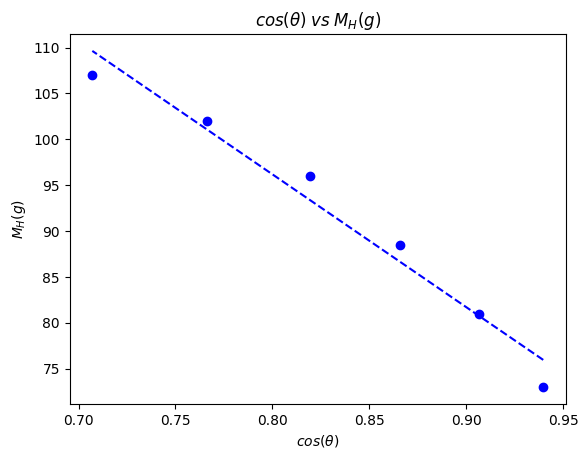

In [8]:
# We should figure out a way to deifne the chart details in the calculations section such that this section can remain static.

# Plot the measurements
plt.scatter(df_graph[dataColumnNames[4]], df_graph[dataColumnNames[3]], color="blue", marker="o");

# Plot the trendline
p = np.poly1d(trend)

fit = np.polyval(trend, df_graph[dataColumnNames[3]])
plt.plot(df_graph[dataColumnNames[4]], p(df_graph[dataColumnNames[4]]), color="blue", linestyle="--")

# Add labels w LaTeX support
plt.xlabel(plt1_xaxis.value);
plt.ylabel(plt1_yaxis.value);
plt.title(plt1_title.value);
plt.rcParams['text.usetex'] = True;
plt.rcParams['font.family'] = 'serif';

# Show the graph
plt.show();

In [9]:
%%markdown

Using the least squares method a trend line is fit to the data with *slope* {trend_slope_str} and *$y$-intercept* {trend_intercept_str}, resulting in the equation $ y = {trend_slope_str} x + {trend_intercept_str} $.


Using the least squares method a trend line is fit to the data with *slope* -144.864 and *$y$-intercept* 212.074, resulting in the equation $ y = -144.864 x + 212.074 $.


In [10]:
%%markdown

<p style="page-break-after:always;"></p>

## Results

The value of $μ$ was determined using the mean, $μ_t$, and the least squares fit, $μ_g$. 

$μ_t = {u_k_t_str} $ with $σ$ of ${u_k_t_dev_str}$

$μ_g = {u_k_g_str} $

This equates to a ${u_k_diff_str}$% difference.

## Discussion

{discussion.value}

## Questions

__Why do you try to maintain the constant speed motion of the block?__

{q1.value}

__What is the most important part of the experiment?__

{q2.value}


<p style="page-break-after:always;"></p>

## Results

The value of $μ$ was determined using the mean, $μ_t$, and the least squares fit, $μ_g$. 

$μ_t = 0.323 $ with $σ$ of $0.005$

$μ_g = -1.271 $

This equates to a $-3.364$% difference.

## Discussion

Discussion

## Questions

__Why do you try to maintain the constant speed motion of the block?__

Question 1 Answer

__What is the most important part of the experiment?__

Question 2 Answer
